# Предобработка данных
## Цель работы
Познакомиться с основными задачами и приемами предварительного анализа и обработки данных для целей машинного обучения

Предварительная обработка данных является неотъемлемым этапом машинного обучения, поскольку качество данных и полезная информация, которую можно извлечь из них, напрямую влияют на способность нашей модели к обучению; поэтому чрезвычайно важно, чтобы мы предварительно обработали наши данные, прежде чем вводить их в нашу модель.

## Содержание работы
1. Загрузите данные о пассажирах Титаника и познакомьтесь со структурой датасета.
2. Проведите анализ и визуализацию каждого признака датасета. Сделайте вывод о виде распределения и шкале каждого признака.
3. Проанализируйте влияние каждого признака на целевую переменную. Проиллюстрируйте ее графиками.
4. Исследуйте и исправьте при необходимости пропущенные значения в датасете.
5. Преобразуйте категориальные признаки в численные самым подходящим способом.

### 1. Загрузите данные о пассажирах Титаника и познакомьтесь со структурой датасета.

In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [220]:
df = pd.read_csv('data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [222]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [223]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### 2. Проведите анализ и визуализацию каждого признака датасета. Сделайте вывод о виде распределения и шкале каждого признака.

In [224]:
def custom_hist(training_set, title,  xlabel, ylabel='Количество', bins=None):
    figsize = (20,6)
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.title(title)
    plt.hist(training_set, training_set.max().astype(int) if bins is None else bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

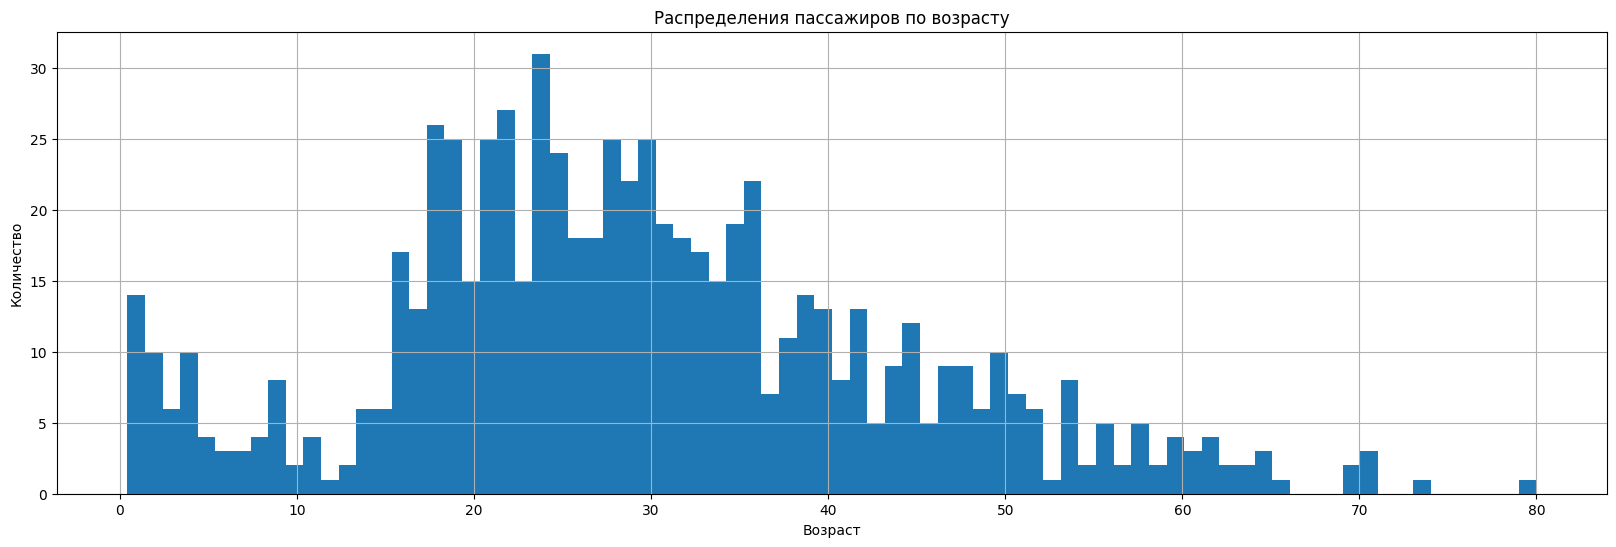

In [225]:
custom_hist(df["Age"], 'Распределения пассажиров по возрасту', 'Возраст')

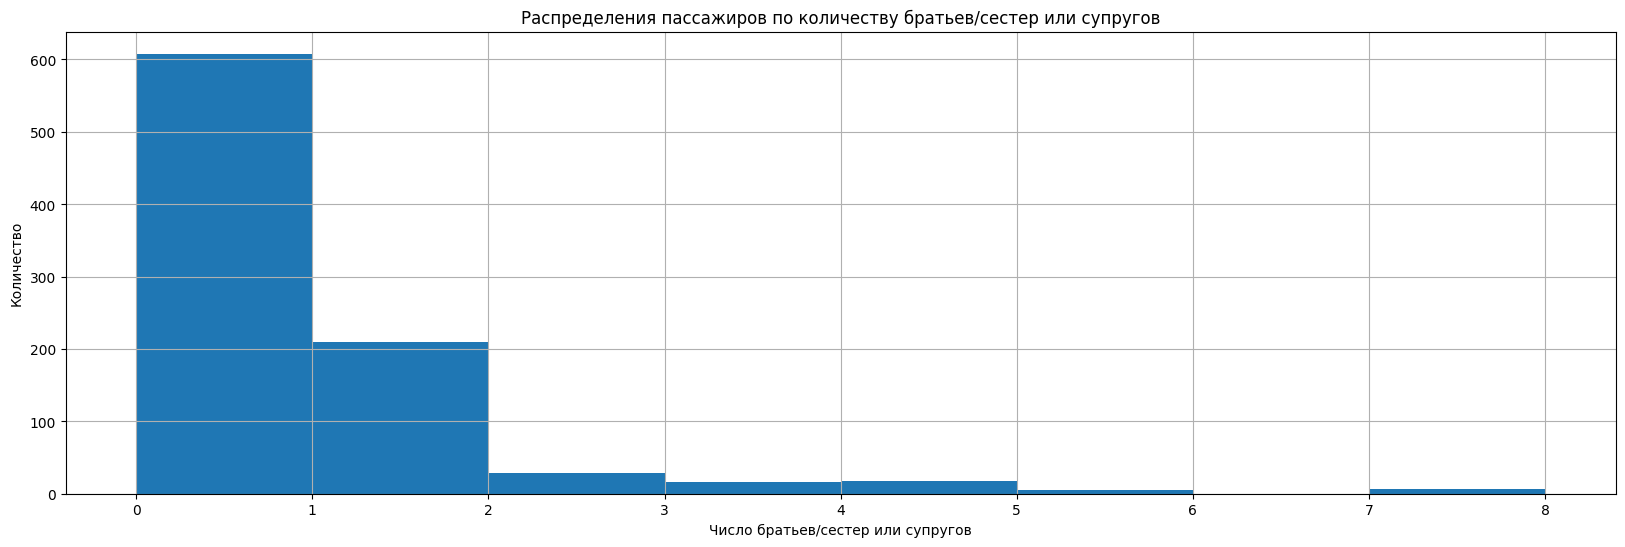

In [226]:
custom_hist(df["SibSp"], 'Распределения пассажиров по количеству братьев/сестер или супругов', 
  'Число братьев/сестер или супругов')

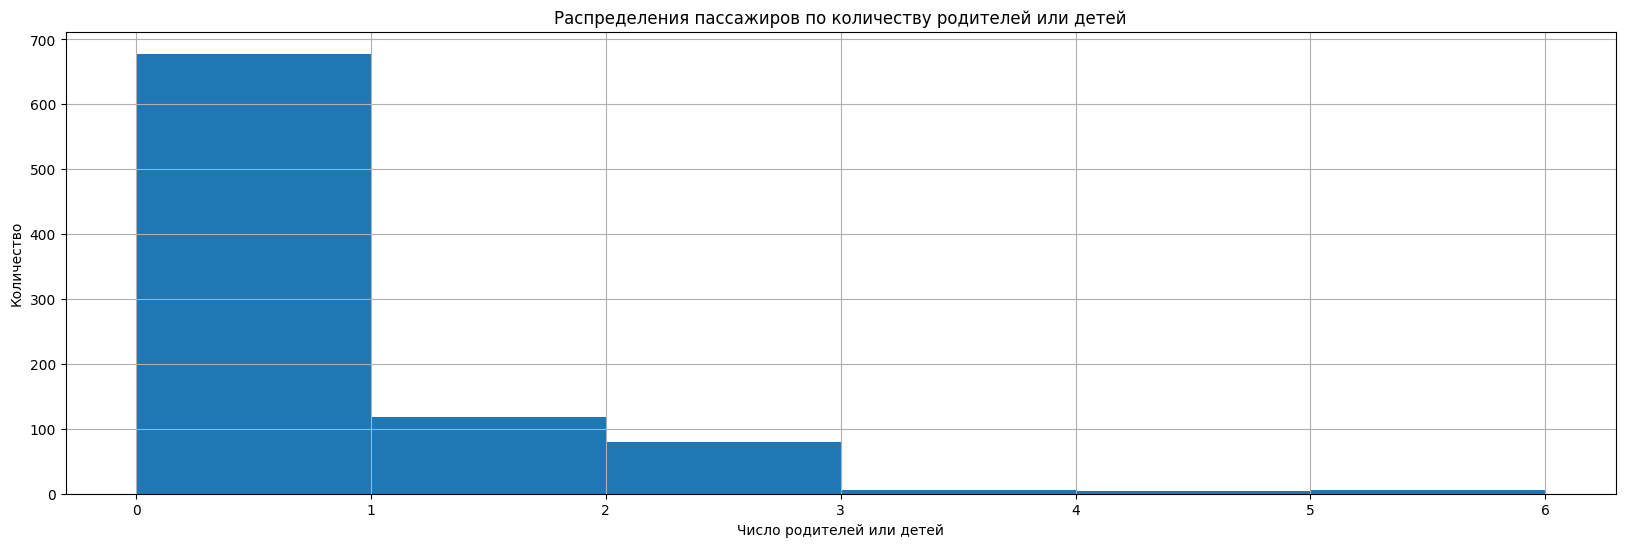

In [227]:
custom_hist(df["Parch"], 'Распределения пассажиров по количеству родителей или детей', 
  'Число родителей или детей')

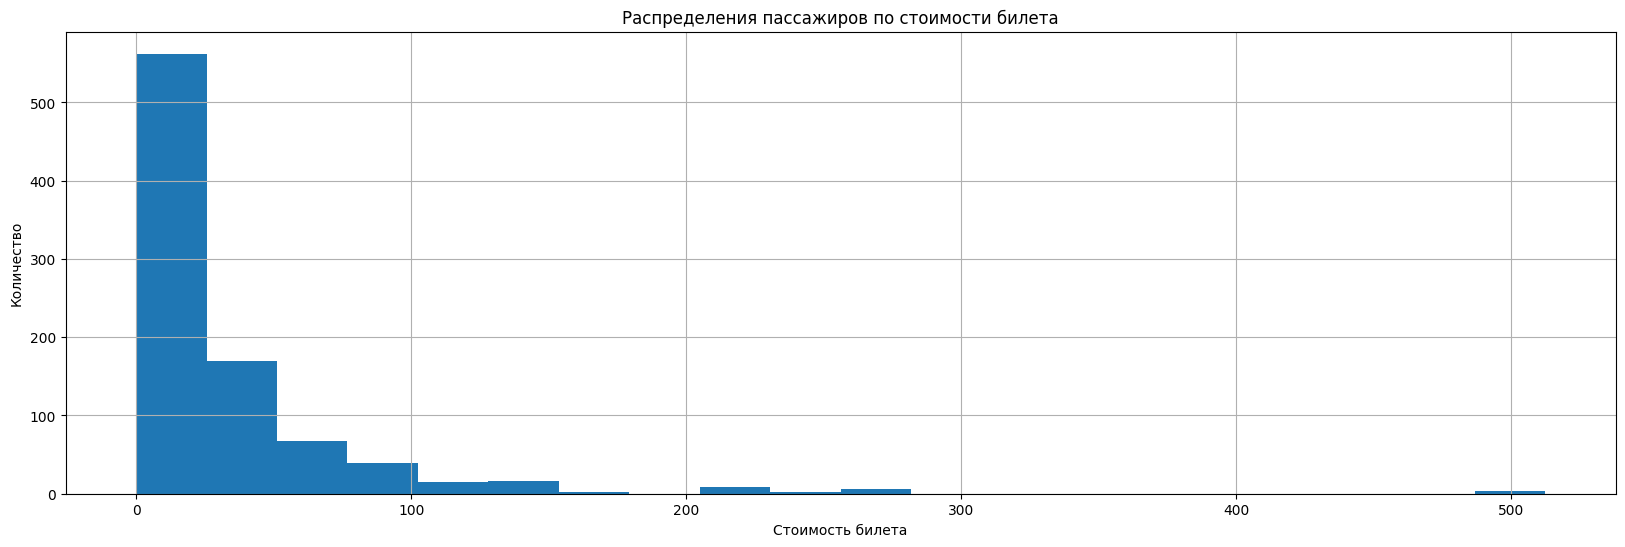

In [228]:
custom_hist(df["Fare"], 'Распределения пассажиров по стоимости билета', 
  'Стоимость билета', bins=20)

<Axes: ylabel='Frequency'>

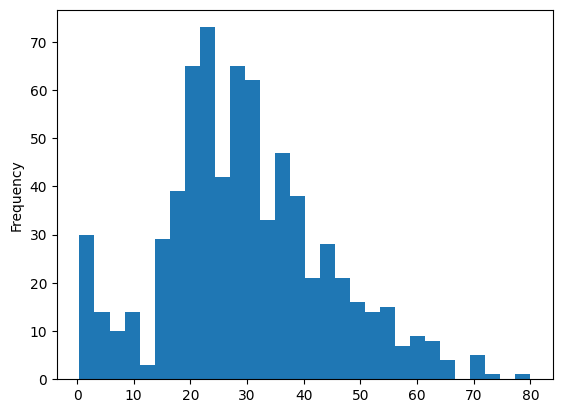

In [229]:
df['Age'].plot.hist(bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

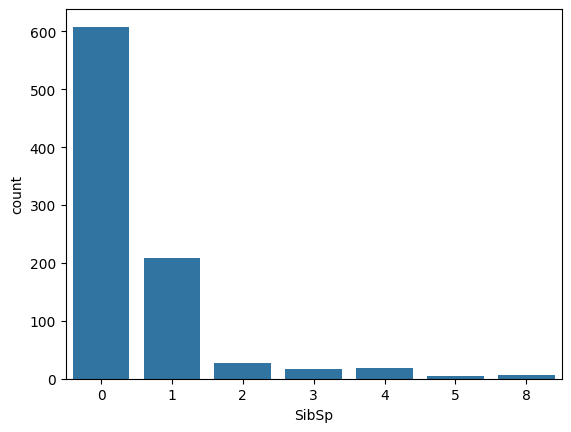

In [230]:
sns.countplot(x='SibSp', data=df)

In [231]:
df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

<Axes: >

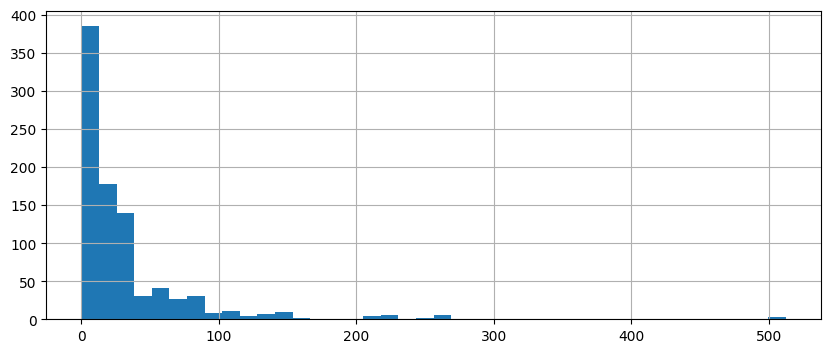

In [232]:
df['Fare'].hist(bins=40, figsize=(10,4))

### 3. Проанализируйте влияние каждого признака на целевую переменную. Проиллюстрируйте ее графиками.

<Axes: xlabel='Survived', ylabel='count'>

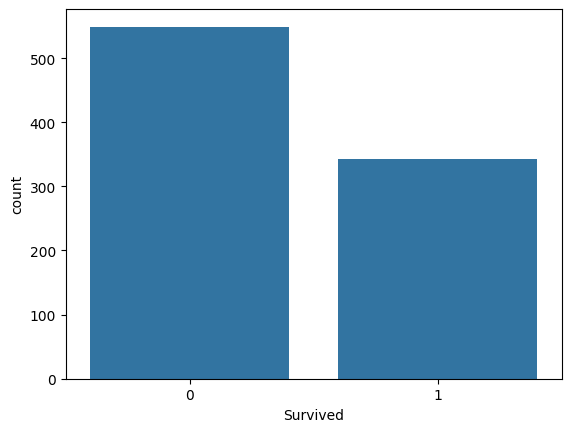

In [233]:
sns.countplot(x='Survived', data=df)

<Axes: xlabel='Survived', ylabel='count'>

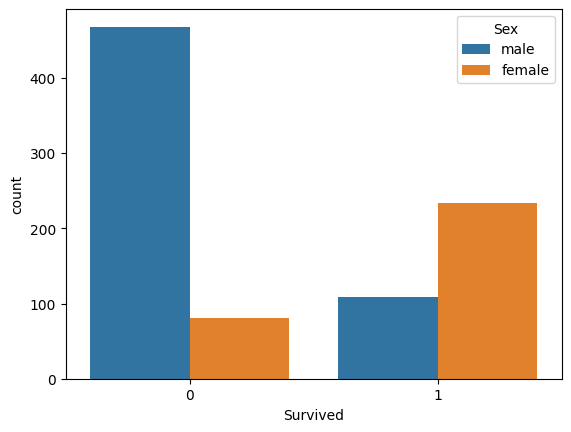

In [234]:
sns.countplot(x='Survived', data=df, hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

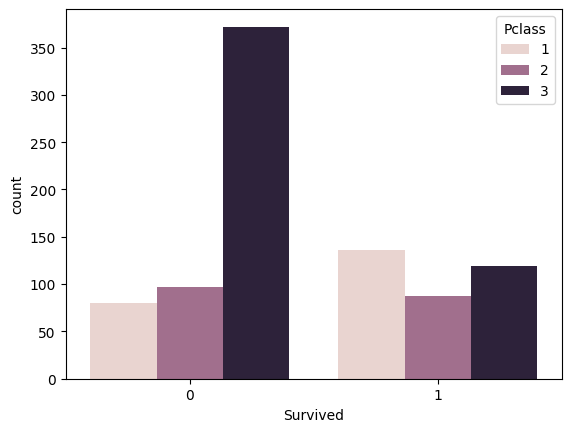

In [235]:
sns.countplot(x='Survived', data=df, hue='Pclass')

<Axes: xlabel='Pclass', ylabel='Age'>

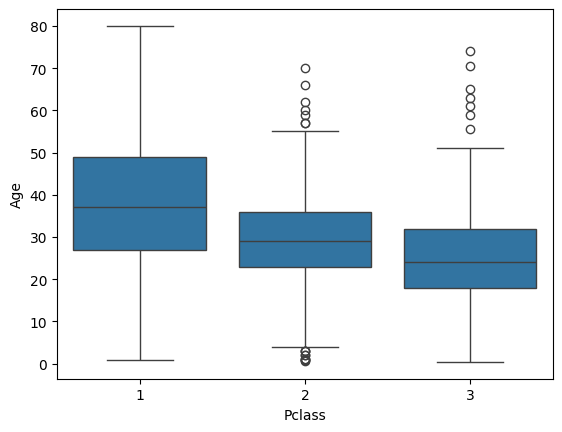

In [236]:
sns.boxplot(x='Pclass', y='Age', data=df)

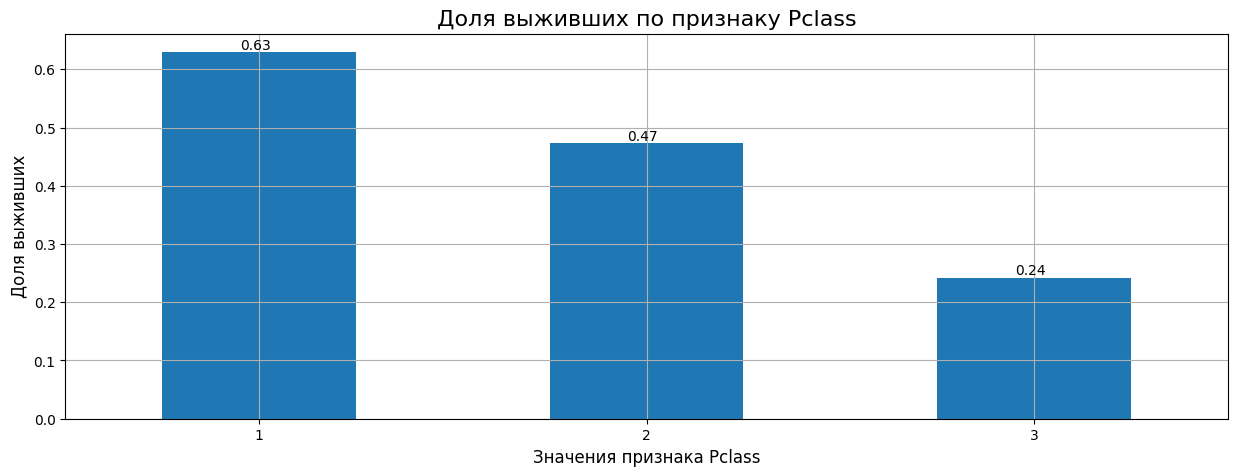

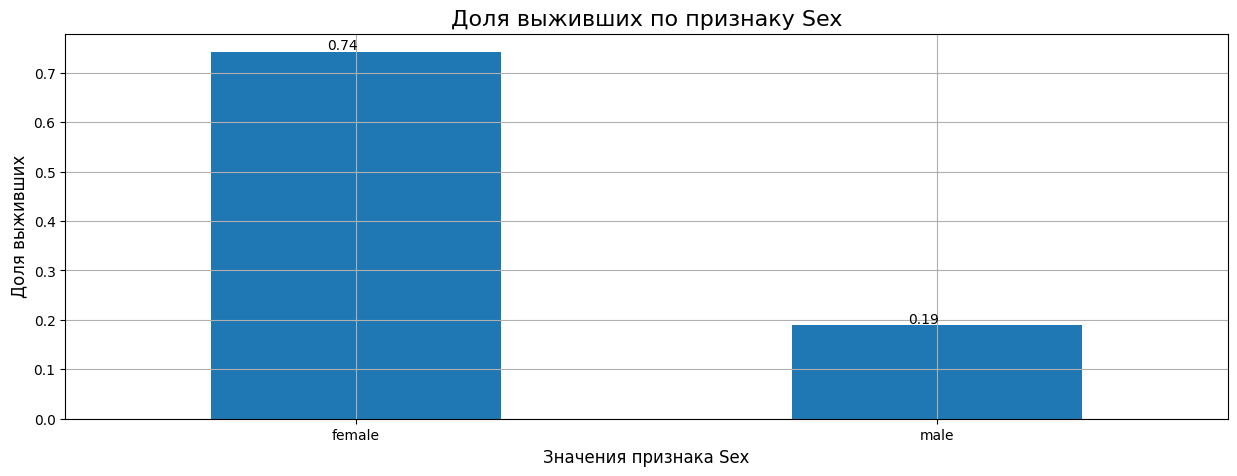

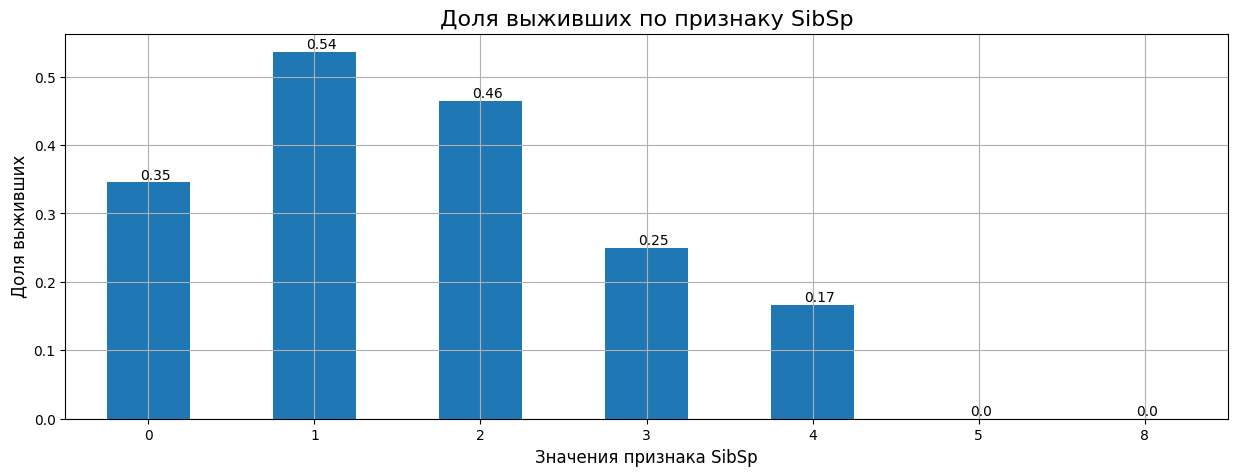

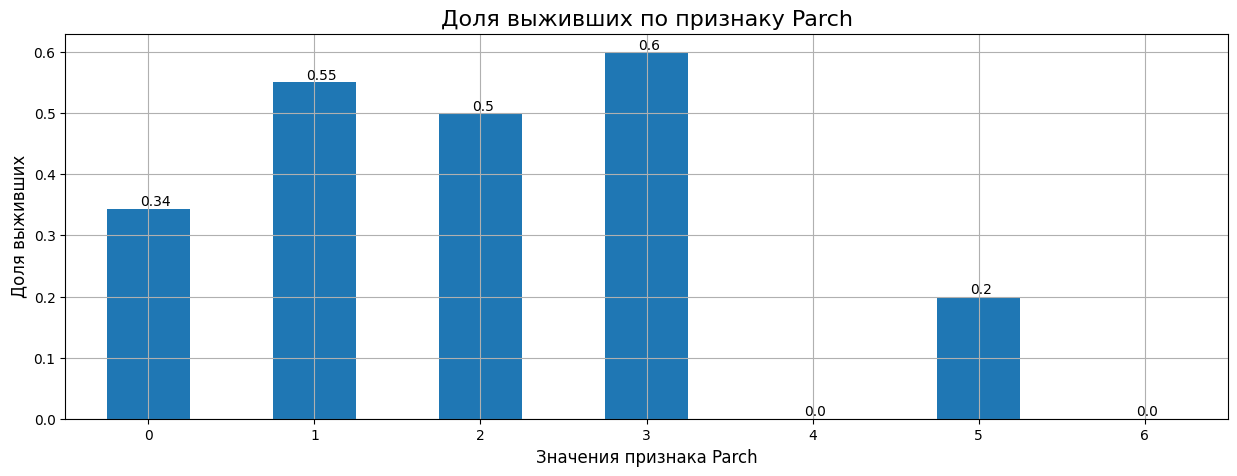

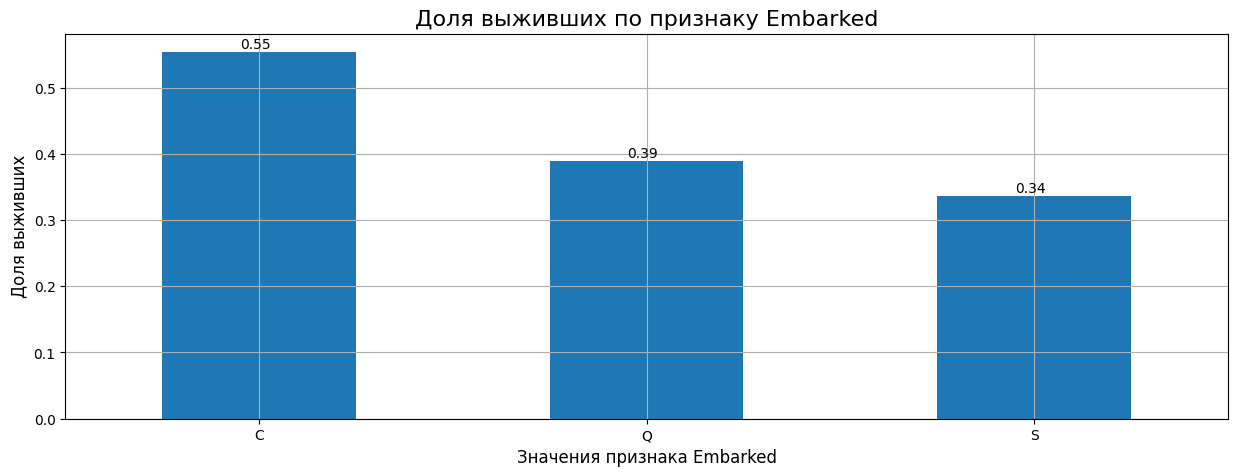

In [237]:
columns_to_look = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for column in columns_to_look:
    pivot = df.pivot_table(index=column, values='Survived', aggfunc='mean')
    
    fig, ax = plt.subplots(figsize=(15,5))
    ax.set_title(f'Доля выживших по признаку {column}', fontdict={'size': 16})
    ax.set_ylabel('Доля выживших', fontdict={'size': 12})
    ax.set_xlabel(column, fontdict={'size': 12})
    
    for cnt in range(pivot.shape[0]):
        value = pivot.iloc[cnt].values[0]
        ax.text(cnt - .05, value + .005, round(value, 2))
        
    pivot.plot(kind='bar', rot=0, grid=True, legend=False, ax=ax) 
    ax.set_xlabel(f'Значения признака {column}', fontdict={'size': 12})
    plt.show()

### 4. Исследуйте и исправьте при необходимости пропущенные значения в датасете.

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [239]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

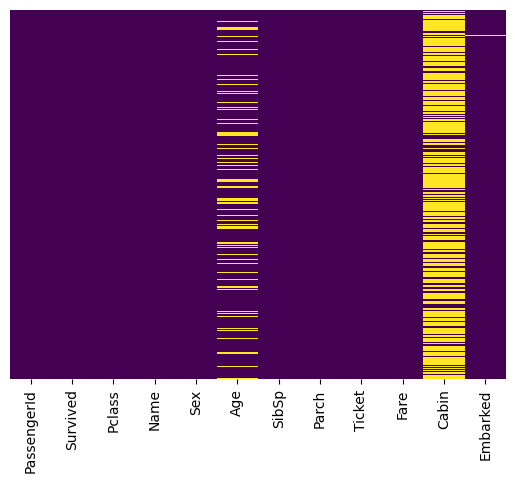

In [240]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [241]:
df.drop('Cabin', axis=1, inplace=True)

In [242]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

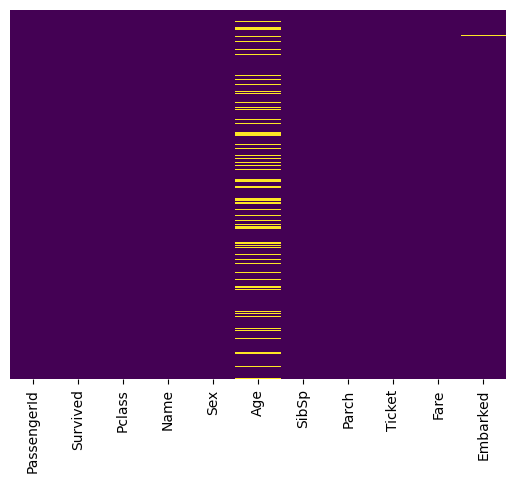

In [243]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [244]:
df.dropna(inplace=True)

In [245]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 5. Преобразуйте категориальные признаки в численные самым подходящим способом.

In [246]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [247]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(df['Sex'])


In [248]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [249]:
np.unique(cat_enc_le)  

array([0, 1])

In [250]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(df[['Embarked']])  # Вызываем метод fit_transform, возвращает разреженную матрицу из библиотеки Scipy 

In [251]:
df.shape

(712, 11)

In [252]:
cat_enc_ohe.shape

(712, 3)

In [253]:
pd.get_dummies(df['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
885,True,False
886,False,True
887,True,False
889,False,True


In [254]:
pd.get_dummies(df['Sex'], drop_first=True)

,male
0,True
1,False
2,False
3,False
4,True
...,...
885,False
886,True
887,False
889,True


In [255]:
sex = pd.get_dummies(df['Sex'], drop_first=True)

In [256]:
embark = pd.get_dummies(df['Embarked'], drop_first=True)

In [257]:
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [258]:
df = pd.concat([df, sex, embark], axis=1)

In [259]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [260]:
df.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [261]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


## Задания для самостоятельного выполнения

### 1. Постройте по получившемуся набору данных простую модель машинного обучения и оцените ее эффективность.

In [262]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [263]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [265]:
rfs = RandomForestClassifier()

In [266]:
rfs.fit(X_train, y_train)

RandomForestClassifier()

In [267]:
grid = GridSearchCV(rfs, {'n_estimators': [3, 10, 30], 'max_depth': [2, 4, 6, 8, 10]}, cv=5)

In [268]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'n_estimators': [3, 10, 30]})

In [269]:
best_params = grid.best_params_
best_params

{'max_depth': 10, 'n_estimators': 10}

In [270]:
best_rfs = RandomForestClassifier(**best_params)

In [271]:
best_rfs.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10)

In [272]:
y_pred_test = best_rfs.predict(X_test)
y_pred_test

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [273]:
accuracy_score(y_test, y_pred_test)

0.7902097902097902

In [274]:
f1_score(y_test, y_pred_test)

0.7457627118644068

### 2. Ответьте на следующие вопросы при помощи визуализации и численных данных по исходному набору данных:

### 3. Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [275]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


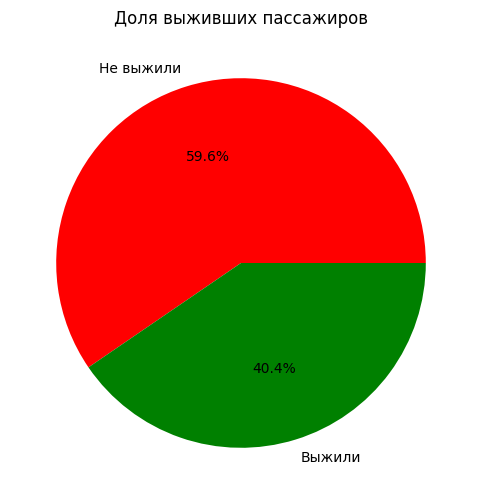

In [276]:
plt.figure(figsize=(6, 6))
plt.title("Доля выживших пассажиров")
df['Survived'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', labels=['Не выжили', 'Выжили'], colors=['red', 'green'])
plt.ylabel('')
plt.show()

<Axes: ylabel='proportion'>

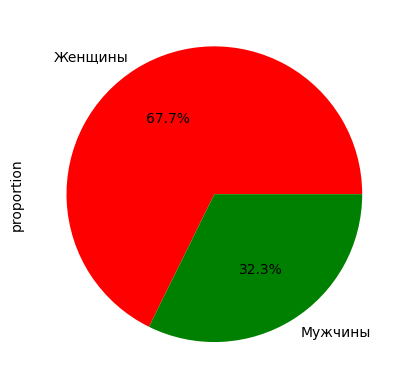

In [277]:
df.query('Survived == 1')['male'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', labels=['Женщины', 'Мужчины'], colors=['red', 'green'])

### 4. Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [278]:
df.shape

(712, 9)

In [279]:
pclass_df = df.groupby(['male', 'Pclass']).agg({'Pclass': 'count'}).rename(columns={'Pclass': 'count_people'})
pclass_df

count_people
male  Pclass              
False 1                 83
      2                 74
      3                102
True  1                101
      2                 99
      3                253

<Axes: xlabel='Pclass', ylabel='count_people'>

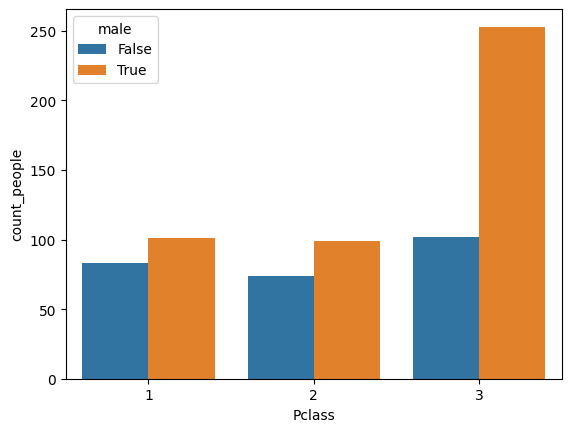

In [280]:
sns.barplot(x='Pclass', y='count_people', hue='male', data=pclass_df)

### 5. Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

In [281]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


Все, и можно сделать интересный момент с возрастом и стоимостью билета - разделить их на три категории

### 6. Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение диаграммы рассеяния).

In [282]:
df[["Age", "Fare"]].corr()

,Age,Fare
Age,1.000000,0.093143
Fare,0.093143,1.000000


<Axes: xlabel='Age', ylabel='Fare'>

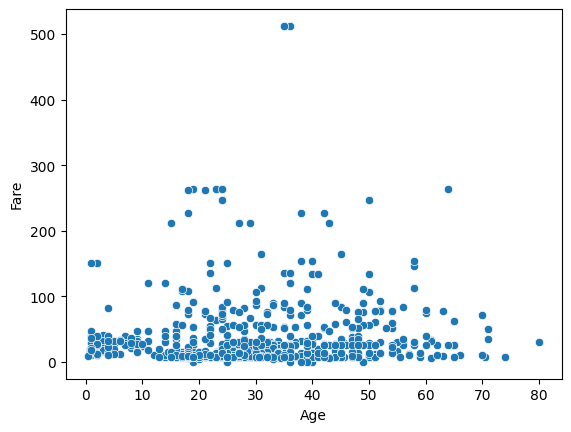

In [283]:
sns.scatterplot(x='Age', y='Fare', data=df)

### 7. Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

In [284]:
survived_pclass_df = df.groupby(['Pclass', 'Survived']).agg({'Survived': 'count'}).rename(columns={'Survived': 'survived_count'})
survived_pclass_df

survived_count
Pclass Survived                
1      0                     64
       1                    120
2      0                     90
       1                     83
3      0                    270
       1                     85

<Axes: xlabel='Survived', ylabel='survived_count'>

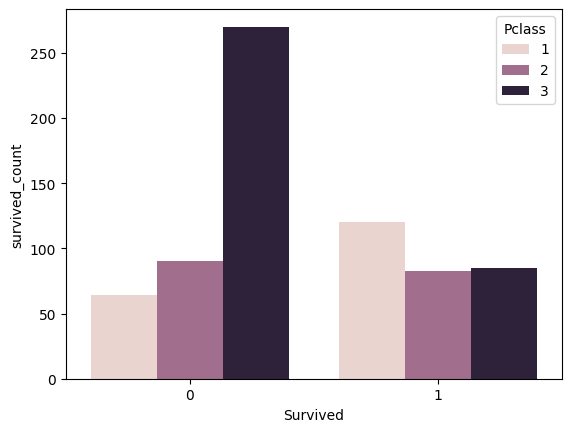

In [285]:
sns.barplot(x='Survived', y='survived_count', hue='Pclass', data=survived_pclass_df)

In [286]:
df[['Pclass', 'Survived']].corr()

,Pclass,Survived
Pclass,1.000000,-0.356462
Survived,-0.356462,1.000000


Несильная отрицательная зависимость

### 8. Какова связь между стоимостью билета и портом отправления? Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне.

In [287]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [288]:
df[["Q", "S", "Survived"]].corr()

,Q,S,Survived
Q,1.000000,-0.378859,-0.048966
S,-0.378859,1.000000,-0.159015
Survived,-0.048966,-0.159015,1.000000


In [289]:
df[['Fare']].agg(['min', 'mean', 'max'])

,Fare
min,0.000000
mean,34.567251
max,512.329200


In [290]:
df.query('S == 1')[['Fare']].agg(['min', 'mean', 'max'])

,Fare
min,0.000000
mean,27.476284
max,263.000000


### 9. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

In [291]:
titanic = pd.read_csv('data/titanic.csv')

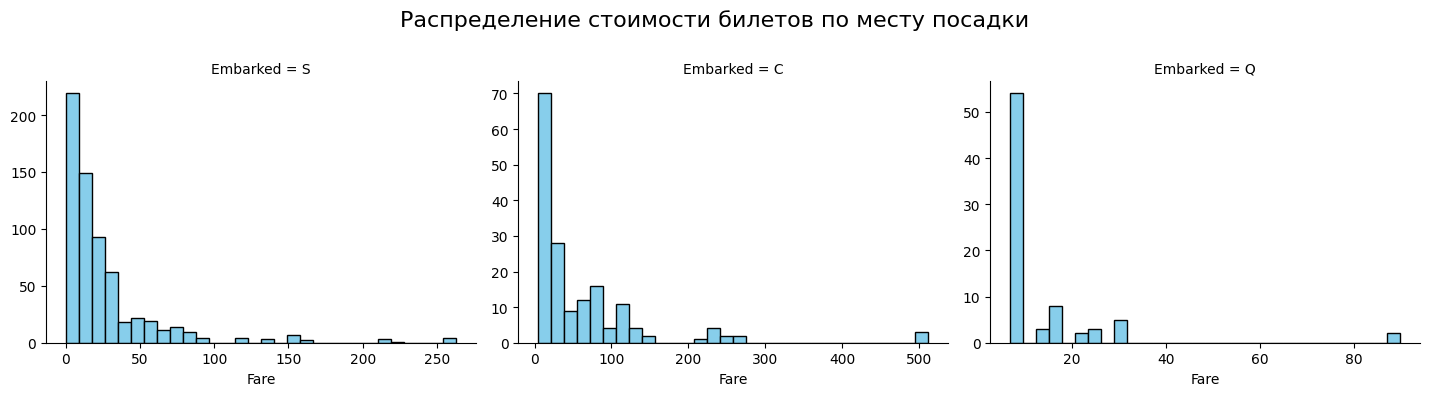

In [292]:
g = sns.FacetGrid(titanic.dropna(subset=['Embarked']), col="Embarked", sharex=False, sharey=False, height=4, aspect=1.2)
g.map(plt.hist, "Fare", bins=30, color="skyblue", edgecolor="black")
g.figure.suptitle("Распределение стоимости билетов по месту посадки", fontsize=16)
plt.subplots_adjust(top=0.8)
plt.show()

### 10. Оцените репрезентативность представленной выборки. Сколько всего было пассажиров Титаника? Сколько из них выжило? Какую долю составляет представленный набор данных от всей генеральной совокупности?

In [293]:
total_passengers = 2208
survived_passengers = 712
sample_size = df.shape[0]

print("Всего пассажиров на Титанике:", total_passengers)
print("Выжило пассажиров:", survived_passengers)
print("Доля представленного набора данных от генеральной совокупности:",
    round(sample_size / total_passengers, 2))

Всего пассажиров на Титанике: 2208
Выжило пассажиров: 712
Доля представленного набора данных от генеральной совокупности: 0.32


### 11. Разделите выборку на тестовую и обучающую части при помощи train_test_split(). Изобразите на графиках распределение некоторых атрибутов и целевой переменной. Насколько однородно получившееся разбиение?

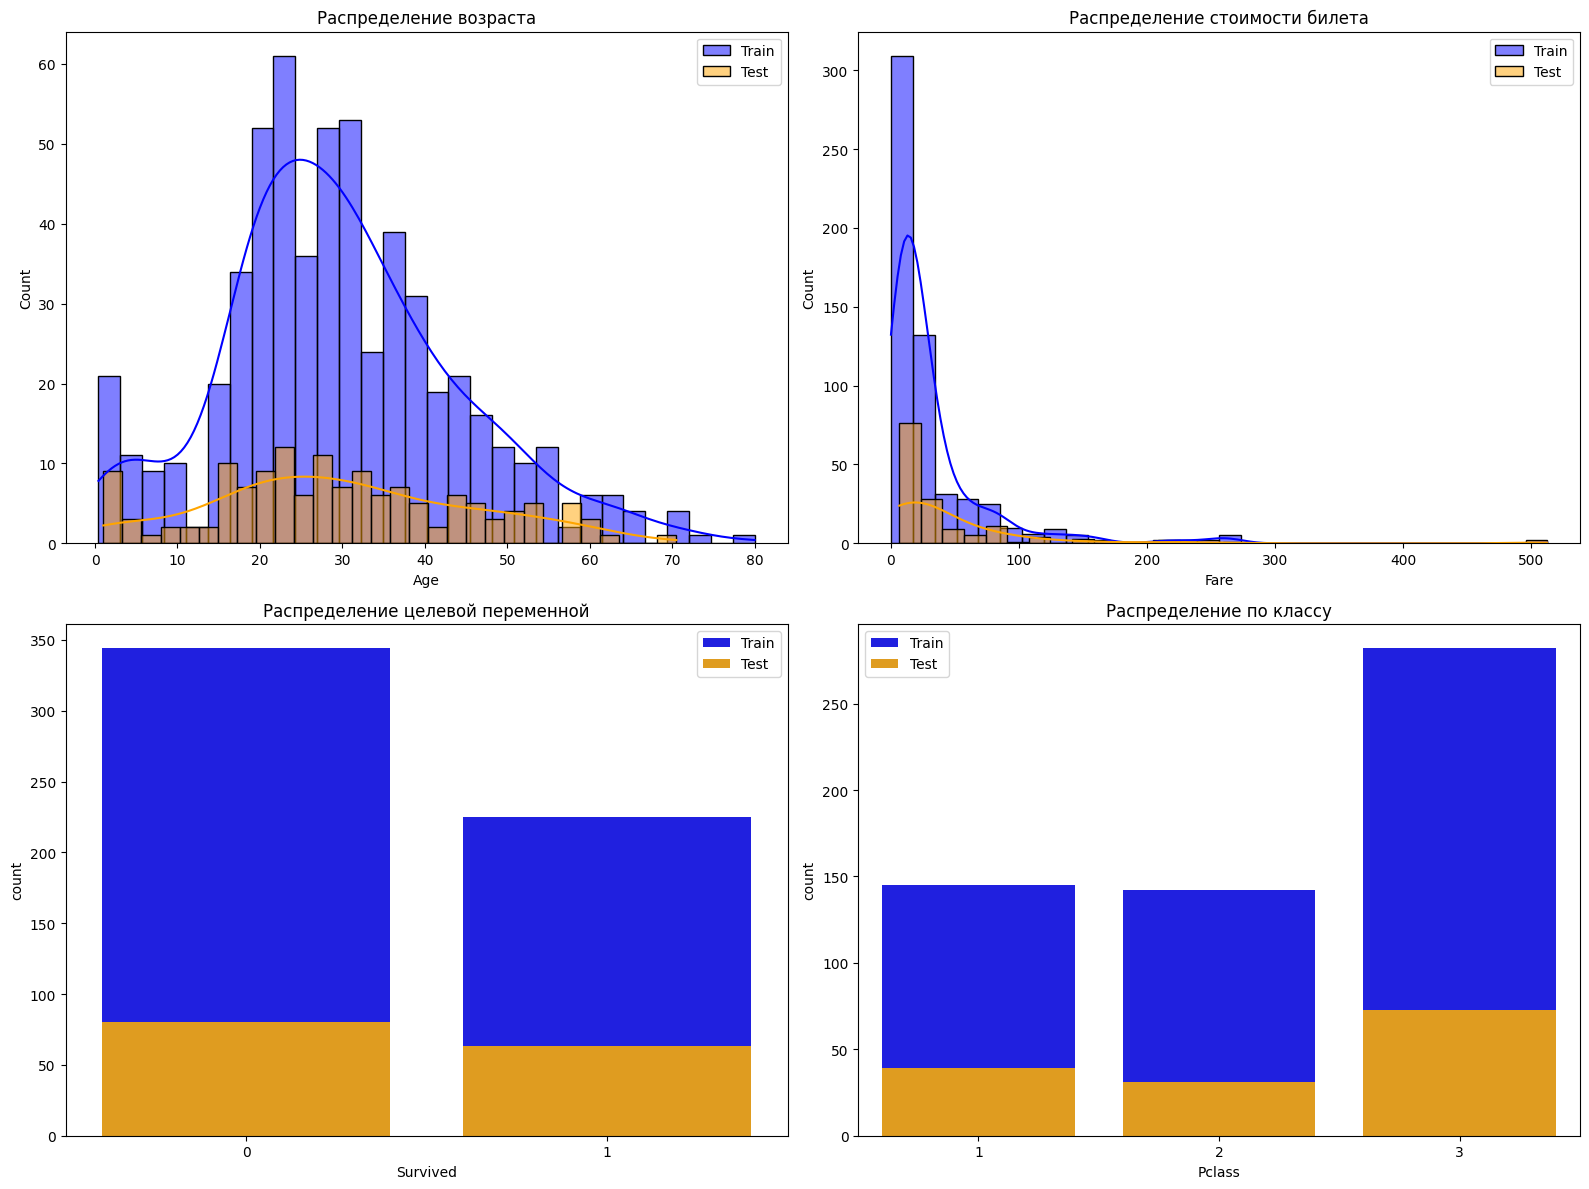

In [294]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.histplot(X_train['Age'], bins=30, kde=True, color='blue', ax=axes[0, 0], label='Train')
sns.histplot(X_test['Age'], bins=30, kde=True, color='orange', ax=axes[0, 0], label='Test')
axes[0, 0].set_title('Распределение возраста')
axes[0, 0].legend()

sns.histplot(X_train['Fare'], bins=30, kde=True, color='blue', ax=axes[0, 1], label='Train')
sns.histplot(X_test['Fare'], bins=30, kde=True, color='orange', ax=axes[0, 1], label='Test')
axes[0, 1].set_title('Распределение стоимости билета')
axes[0, 1].legend()

sns.countplot(x=y_train, ax=axes[1, 0], color='blue', label='Train')
sns.countplot(x=y_test, ax=axes[1, 0], color='orange', label='Test')
axes[1, 0].set_title('Распределение целевой переменной')
axes[1, 0].legend(['Train', 'Test'])

sns.countplot(x=X_train['Pclass'], ax=axes[1, 1], color='blue', label='Train')
sns.countplot(x=X_test['Pclass'], ax=axes[1, 1], color='orange', label='Test')
axes[1, 1].set_title('Распределение по классу')
axes[1, 1].legend(['Train', 'Test'])

plt.tight_layout()
plt.show()

### 12. Сбалансируйте классы в исходном датасете двумя способами:

### 13. Удалите лишние объекты мажоритарного класса (выбранные случайно)

In [295]:
min_count = df['Survived'].value_counts().min()
min_count

288

In [296]:
df_majority = df[df['Survived'] == df['Survived'].value_counts().idxmax()].sample(min_count, random_state=42)
df_minority = df[df['Survived'] == df['Survived'].value_counts().idxmin()]

In [297]:
df_balanced = pd.concat([df_majority, df_minority], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)
df_balanced.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,30.0,0,0,7.2250,True,False,False
1,0,3,6.0,4,2,31.2750,False,False,True
2,1,3,27.0,0,0,7.9250,False,False,True
3,1,1,48.0,1,0,76.7292,True,False,False
4,1,1,42.0,0,0,227.5250,False,False,False


### 14. Добавьте в выборку дубликаты миноритарного класса.

In [298]:
df_oversampled = pd.concat([df, df_minority], ignore_index=True)
print("Распределение классов после добавления дубликатов миноритарного класса:")
print(df_oversampled['Survived'].value_counts())

Распределение классов после добавления дубликатов миноритарного класса:
Survived
1    576
0    424
Name: count, dtype: int64


### 15. Проведите исследование эффективности простой модели классификации до и после данных преобразований.

In [299]:
rfs = RandomForestClassifier()

In [300]:
X = df_oversampled.drop('Survived', axis=1)
y = df_oversampled['Survived']

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [302]:
rfs.fit(X_train, y_train)

RandomForestClassifier()

In [303]:
y_pred_test = rfs.predict(X_test)

In [304]:
accuracy_score(y_test, y_pred_test)

0.915

In [305]:
f1_score(y_test, y_pred_test)

0.9317269076305221

Мы можем заметить, если сравнивать с пунктом 1, то у нас качество модели увеличилось.

### 16. Постройте корреляционную матрицу признаков после преобразования данных. Сделайте вывод о наличии либо отсутствии мультиколлинеарности признаков.

In [306]:
df_oversampled.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
Survived,1.000000,-0.352397,-0.082353,-0.016567,0.097277,0.240089,-0.522241,-0.051443,-0.154697
Pclass,-0.352397,1.000000,-0.363571,0.043854,0.022741,-0.549384,0.178609,0.139303,0.202875
Age,-0.082353,-0.363571,1.000000,-0.263353,-0.224668,0.109087,0.068661,-0.031472,-0.016126
SibSp,-0.016567,0.043854,-0.263353,1.000000,0.359281,0.124823,-0.093654,0.022489,0.020417
Parch,0.097277,0.022741,-0.224668,0.359281,1.000000,0.174489,-0.218832,-0.035688,0.030234
Fare,0.240089,-0.549384,0.109087,0.124823,0.174489,1.000000,-0.174661,-0.069177,-0.261141
male,-0.522241,0.178609,0.068661,-0.093654,-0.218832,-0.174661,1.000000,-0.028636,0.111007
Q,-0.051443,0.139303,-0.031472,0.022489,-0.035688,-0.069177,-0.028636,1.000000,-0.339237
S,-0.154697,0.202875,-0.016126,0.020417,0.030234,-0.261141,0.111007,-0.339237,1.000000


Мультиколлинеарность выражена слабо – не наблюдаются высокие абсолютные значения коэффициентов. Единственное, что можно отметить, это умеренная отрицательная корреляция между Fare и Pclass, а также male и Survived.

### 17. Проведите группировку данных по значению возраста. Введите новый признак "возрастная категория", значениями которой будут "ребенок", "взрослый", "старик". Проведите анализ эффективности данного признака.

In [307]:
def get_age_group(age):
    if age < 18:
        return 0
    elif 18 <= age < 45:
        return 1
    else:
        return 2

In [308]:
df_oversampled['age_group'] = df_oversampled['Age'].apply(get_age_group)

In [309]:
df_oversampled['age_group'].value_counts()

age_group
1    670
0    174
2    156
Name: count, dtype: int64

In [310]:
rfs = RandomForestClassifier()
X = df_oversampled.drop('Survived', axis=1)
y = df_oversampled['Survived']

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [312]:
rfs.fit(X_train, y_train)

RandomForestClassifier()

In [313]:
y_pred_test = rfs.predict(X_test)

In [314]:
accuracy_score(y_test, y_pred_test)

0.93

Данный параметр крупных изменений не внес, однако мы видим положительный результат